In [1]:
%matplotlib inline

import sympy as sp
sp.init_printing(use_latex ='mathjax')
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lmfit as lf
import os
import seaborn as sns
from myheatmap import myheatmap
from lmfit import Model
import lmfit
from tabulate import tabulate
import matplotlib

sns.set_context('poster') # makes text larger (poster) or smaller (paper)

In [2]:
## Mac versus PC
mac = False

In [3]:
#Determine amplitude and phase of each resonator for lower and higher frequency modes based on mode map

#Define funciton to mask mode maps
def maskplot(df, mk, column, uselog=False, cbarlims = None, **kwargs):
    rlogmkname = column + 'logmk'
    rmkname = column + 'mk'
    df[rlogmkname] = np.log10(df[column][mk]) 
    df[rmkname] = df[column][mk]

    if uselog:
        values = rlogmkname
    else:
        values = rmkname
    dfgrid = df.pivot_table(index = 'Green Y', columns = 'Green X', values = values).sort_index(axis = 0, ascending = False)
    ax,cbar = myheatmap(dfgrid, values, return_cbar = True, **kwargs)
    plt.xlabel(u'$x$ (μm)')
    plt.ylabel(u'$y$ (μm)')
    plt.gca().axis('equal')
    return ax, cbar

#Define number of points averaged for amplitude and phase
n_amp = 10
n_phase = 10

\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\09\21\PosGU01ArrayBr=0.35p=2.1Device0.2Drum1_2V152900
Low Average amplitude of R1:  9.76609e-05
Low Average phase of R1:  1.3325009587999999
Low Driving Frequency in rad/s: 34966744.68217079
Low Average amplitude of R2:  3.31309e-05
Low Average phase of R2:  1.0386666115
Low Driving Frequency in rad/s: 34966744.68217079


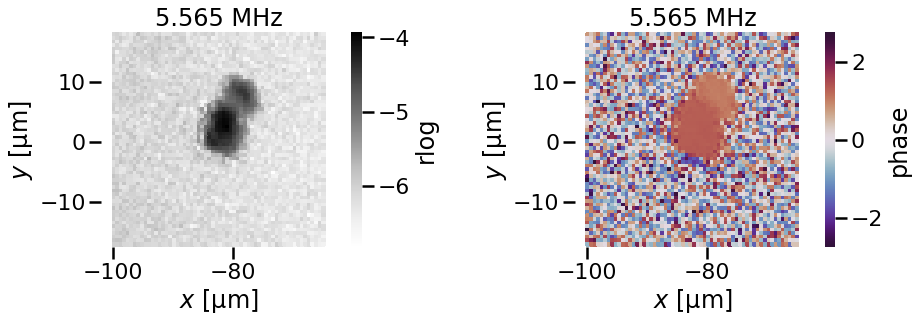

In [4]:
#Plot mode map of lower frequency mode

if mac:
    folder1 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample 3 2021/2021/09/21/'
else:
    folder1 = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\09\21'
file1 = 'PosGU01ArrayBr=0.35p=2.1Device0.2Drum1_2V152900' 
path1 = os.path.join(folder1,file1)
print(path1)
df_map1 = pd.read_csv(os.path.join(path1, 'Demod1.csv'), skiprows = 2)
df_map1['w'] = df_map1.frequency * 2 * np.pi
#print(df) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
df_map1['rlog'] = np.log10(df_map1.r) 
amp1 = df_map1.pivot_table(index = 'Green Y', columns = 'Green X', values = 'rlog').sort_index(axis = 0, ascending = False) 
myheatmap(amp1, 'rlog', cmap = 'Greys');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.axis('equal')
ax1.set_title(str(round(df_map1.frequency[0]/1e6,3))+ ' MHz')



plt.sca(ax2)
df_map1['rlog'] = np.log10(df_map1.r) 
phase1 = df_map1.pivot_table(index = 'Green Y', columns = 'Green X', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase1, 'phase', cmap='twilight_shifted');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax2.set_title(str(round(df_map1.frequency[0]/1e6,3))+ ' MHz')
plt.tight_layout();

#Mask only R1

mkpos1 = df_map1.phase > 1.2

"""fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map1, mkpos1, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map1, mkpos1, 'phase', cmap = 'twilight_shifted')

plt.tight_layout();"""

#Start table to append driving frequencies, amplitudes and phases
table = [['wDrive', 'R1Amp', 'R1Amp_error', 'R1Phase', 'R1Phase_error', 'R2Amp', 'R2Amp_error', 'R2Phase', 'R2Phase_error']]

#Assign values to variables
d1A1 = df_map1[mkpos1].nlargest(n_amp,['r']).r.mean()
d1p1 = df_map1[mkpos1].nlargest(n_phase,['r']).phase.mean()

d1A1_error = df_map1[mkpos1].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d1p1_error = df_map1[mkpos1].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w1 = df_map1.w[1]

#print data for largest amplitude in masked region
#df_map1.iloc[[df_map1[mkpos1].r.idxmax()]]

#print the average mean and phase of largest 10 data point amplitudes
print('Low Average amplitude of R1: ', d1A1)
print('Low Average phase of R1: ', d1p1)
print('Low Driving Frequency in rad/s:', w1)

#Mask only R2

mkpos2 = (df_map1.phase < 1.2) & (df_map1.phase > 0)

"""fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map1, mkpos2, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map1, mkpos2, 'phase', cmap = 'twilight_shifted')

plt.tight_layout();
"""
#Assign values to variables
d1A2 = df_map1[mkpos2].nlargest(n_amp,['r']).r.mean()
d1p2 = df_map1[mkpos2].nlargest(n_phase,['r']).phase.mean()

d1A2_error = df_map1[mkpos2].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d1p2_error = df_map1[mkpos2].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

#Append info to table
table.append([w1, d1A1, d1A1_error, d1p1, d1p1_error, d1A2, d1A2_error, d1p2, d1p2_error])

#print the average mean and phase of largest 10 data point amplitudes
print('Low Average amplitude of R2: ', d1A2)
print('Low Average phase of R2: ', d1p2)
print('Low Driving Frequency in rad/s:', w1)

\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\09\21\PosGU01ArrayBr=0.35p=2.1Device0.2Drum1_2V153630
High Average amplitude of R1:  0.00020397979999999997
High Average phase of R1:  -1.9990966399
High Driving Frequency in rad/s: 37107308.797756664
High Average amplitude of R2:  0.0001357142
High Average phase of R2:  1.5580427728
High Driving Frequency in rad/s: 37107308.797756664


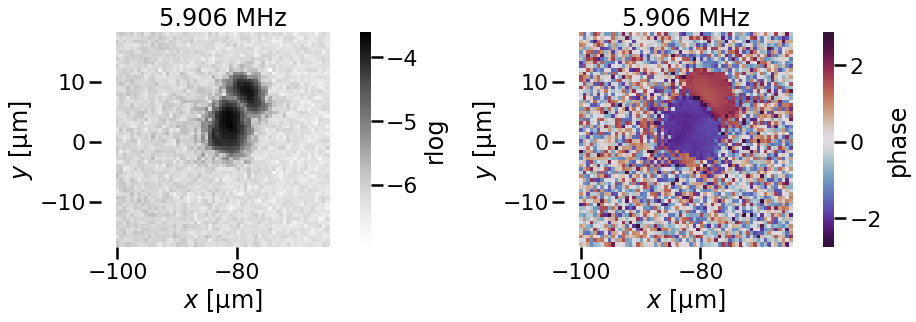

In [26]:
#Plot mode map of lower frequency mode

if mac:
    folder2 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample 3 2021/2021/09/21/'
else:
    folder2 = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\09\21'
file2 = 'PosGU01ArrayBr=0.35p=2.1Device0.2Drum1_2V153630' 
path2 = os.path.join(folder2,file2)
print(path2)
df_map2 = pd.read_csv(os.path.join(path2, 'Demod1.csv'), skiprows = 2)
df_map2['w'] = df_map2.frequency * 2 * np.pi
#print(df) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
df_map2['rlog'] = np.log10(df_map2.r) 
amp2 = df_map2.pivot_table(index = 'Green Y', columns = 'Green X', values = 'rlog').sort_index(axis = 0, ascending = False) 
myheatmap(amp2, 'rlog', cmap = 'Greys');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.set_title(str(round(df_map2.frequency[0]/1e6,3))+ ' MHz')
ax1.axis('equal')


plt.sca(ax2)
df_map2['rlog'] = np.log10(df_map2.r) 
phase2 = df_map2.pivot_table(index = 'Green Y', columns = 'Green X', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase2, 'phase', cmap='twilight_shifted');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax2.set_title(str(round(df_map2.frequency[0]/1e6,3))+ ' MHz')
plt.tight_layout();

#Mask only R1

mkpos3 = df_map2.phase < -1

"""fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map2, mkpos3, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map2, mkpos3, 'phase', cmap = 'twilight_shifted')

plt.tight_layout();"""

#Assign values to variables
d2A1 = df_map2[mkpos3].nlargest(n_amp,['r']).r.mean()
d2p1 = df_map2[mkpos3].nlargest(n_phase,['r']).phase.mean()

d2A1_error = df_map2[mkpos3].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d2p1_error = df_map2[mkpos3].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w2 = df_map2.w[1]


#print the average mean and phase of largest 10 data point amplitudes
print('High Average amplitude of R1: ', d2A1)
print('High Average phase of R1: ', d2p1)
print('High Driving Frequency in rad/s:', w2)


#Mask only R2

mkpos4 = df_map2.phase > 0

"""fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map2, mkpos4, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map2, mkpos4, 'phase', cmap = 'twilight_shifted')

plt.tight_layout();
"""
#Assign values to variables
d2A2 = df_map2[mkpos4].nlargest(n_amp,['r']).r.mean()
d2p2 = df_map2[mkpos4].nlargest(n_amp,['r']).phase.mean()

d2A2_error = df_map2[mkpos4].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d2p2_error = df_map2[mkpos4].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)


#Append info to table
table.append([w2, d2A1, d2A1_error, d2p1, d2p1_error, d2A2, d2A2_error, d2p2, d2p2_error])

#print the average mean and phase of largest 10 data point amplitudes
print('High Average amplitude of R2: ', d2A2)
print('High Average phase of R2: ', d2p2)
print('High Driving Frequency in rad/s:', w2)

\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\09\21\PosGU01ArrayBr=0.35p=2.1Device0.2Drum1_2V162246
High Average amplitude of R1:  0.0002018476
High Average phase of R1:  0.6948438457
High Driving Frequency in rad/s: 35722237.89943639
High Average amplitude of R2:  0.0001143395
High Average phase of R2:  0.1107389142
High Driving Frequency in rad/s: 35722237.89943639


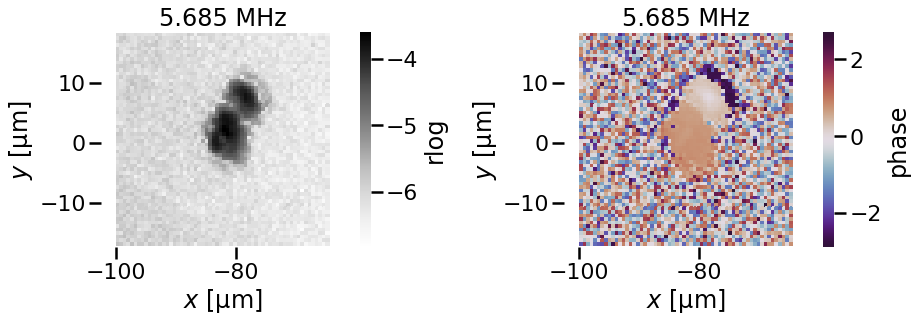

In [27]:
#Plot mode map of lower frequency mode

if mac:
    folder3 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample 3 2021/2021/09/21/'
else:
    folder3 = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\09\21'
file3 = 'PosGU01ArrayBr=0.35p=2.1Device0.2Drum1_2V162246' 
path3 = os.path.join(folder3,file3)
print(path3)
df_map3 = pd.read_csv(os.path.join(path3, 'Demod1.csv'), skiprows = 2)
df_map3['w'] = df_map3.frequency * 2 * np.pi
#print(df) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
df_map3['rlog'] = np.log10(df_map3.r) 
amp3 = df_map3.pivot_table(index = 'Green Y', columns = 'Green X', values = 'rlog').sort_index(axis = 0, ascending = False) 
myheatmap(amp3, 'rlog', cmap = 'Greys');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.set_title(str(round(df_map3.frequency[0]/1e6,3))+ ' MHz')
ax1.axis('equal')


plt.sca(ax2)
df_map3['rlog'] = np.log10(df_map3.r) 
phase3 = df_map3.pivot_table(index = 'Green Y', columns = 'Green X', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase3, 'phase', cmap='twilight_shifted');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax2.set_title(str(round(df_map3.frequency[0]/1e6,3))+ ' MHz')
plt.tight_layout();

#Mask only R1

mkpos5 = df_map3.phase > 0.5

"""fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map3, mkpos5, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map3, mkpos5, 'phase', cmap = 'twilight_shifted')

plt.tight_layout();"""

#Assign values to variables
d3A1 = df_map3[mkpos5].nlargest(n_amp,['r']).r.mean()
d3p1 = df_map3[mkpos5].nlargest(n_phase,['r']).phase.mean()

d3A1_error = df_map3[mkpos5].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d3p1_error = df_map3[mkpos5].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w3 = df_map3.w[1]


#print the average mean and phase of largest 10 data point amplitudes
print('High Average amplitude of R1: ', d3A1)
print('High Average phase of R1: ', d3p1)
print('High Driving Frequency in rad/s:', w3)


#Mask only R2

mkpos6 = (df_map3.phase > 0) & (df_map3.phase < 0.5)

"""fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map3, mkpos6, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map3, mkpos6, 'phase', cmap = 'twilight_shifted')

plt.tight_layout();"""

#Assign values to variables
d3A2 = df_map3[mkpos6].nlargest(n_amp,['r']).r.mean()
d3p2 = df_map3[mkpos6].nlargest(n_phase,['r']).phase.mean()

d3A2_error = df_map3[mkpos6].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d3p2_error = df_map3[mkpos6].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

#Append info to table
table.append([w3, d3A1, d3A1_error, d3p1, d3p1_error, d3A2, d3A2_error, d3p2, d3p2_error])

#print the average mean and phase of largest 10 data point amplitudes
print('High Average amplitude of R2: ', d3A2)
print('High Average phase of R2: ', d3p2)
print('High Driving Frequency in rad/s:', w3)

In [7]:
#Convert table to pandas dataframe

#print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

df_vals = pd.DataFrame(table, columns = table[0])
df_vals = df_vals[1:].reset_index(drop = True)

df_vals

,wDrive,R1Amp,R1Amp_error,R1Phase,R1Phase_error,R2Amp,R2Amp_error,R2Phase,R2Phase_error
0,34966744.682171,0.000098,0.000003,1.332501,0.003452,0.000033,0.000001,1.038667,0.004927
1,37107308.797757,0.000204,0.000007,-1.999097,0.01032,0.000136,0.000005,1.558043,0.012642
2,35722237.899436,0.000202,0.000012,0.694844,0.009137,0.000114,0.000005,0.110739,0.016486


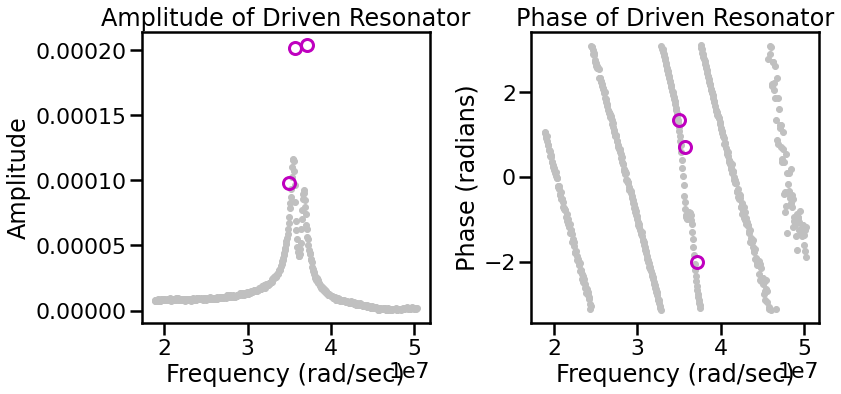

In [8]:
#Import and plot amplitude and phase spectra of R1

if mac:
    base = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample 3 2021/Resonance Curves/'
else:
    base = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\Resonance Curves'
path = os.path.join(base, 'r0.35p2.1Device0.2Drum1_2V','Data.csv')

#Define column names for data frame

colnames = ['SweepVal', 'F', 'R', 'theta', 'NEP_BW', 'R_ref', 'theta_ref', 'Amp', 'Phase']
df = pd.read_csv(path, names = colnames)
df['rad'] = df.theta * np.pi / 180
df['w'] = df.F * 2 * np.pi
df['unwrap'] = np.unwrap(df.rad)

#Plot ampliutde and phase curves"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(12,6))

ax1.plot(df.w, df.R, '.', color = 'silver')
ax1.set_xlabel('Frequency (rad/sec)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Amplitude of Driven Resonator')

#For loop to plot R1 amplitude values from table
for i in range(df_vals.shape[0]):
    ax1.plot(df_vals.wDrive[i], df_vals.R1Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax2.plot(df.w, df.rad, '.', color = 'silver')
#ax2.plot(df.w, df.unwrap, '.', color = 'silver')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (radians)')
ax2.set_title('Phase of Driven Resonator')

#For loop to plot R1 phase valeus from table
for i in range(df_vals.shape[0]):
    ax2.plot(df_vals.wDrive[i], df_vals.R1Phase[i], 'mo', fillstyle='none', markeredgewidth = 3)
    #ax2.plot(df_vals.wDrive[i], df_vals.R1Phase[i] - 4 * np.pi, 'mo', fillstyle='none', markeredgewidth = 3)

fig.tight_layout()

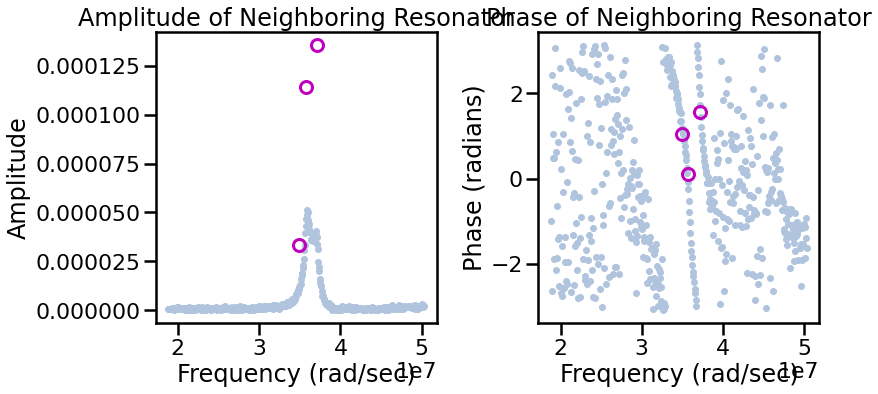

In [9]:
#Import and plot amplitude and phase spectra of R2

if mac:
    base2 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample 3 2021/Resonance Curves/'
else:
    base2 = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\Resonance Curves'
path2 = os.path.join(base2, 'r0.35p2.1Device0.2Drum2_Drum1Drive_2V','Data.csv')

#Define column names for data frame

colnames = ['SweepVal', 'F', 'R', 'theta', 'NEP_BW', 'R_ref', 'theta_ref', 'Amp', 'Phase']
df2 = pd.read_csv(path2, names = colnames)
df2['rad'] = df2.theta * np.pi / 180
df2['w'] = df2.F * 2 * np.pi
df2['unwrap'] = np.unwrap(df2.rad)

#Plot ampliutde and phase curves"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(12,6))

ax1.plot(df2.w, df2.R, '.', color = 'lightsteelblue')
ax1.set_xlabel('Frequency (rad/sec)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Amplitude of Neighboring Resonator')

#For loop to plot R2 amplitude values from table
for i in range(df_vals.shape[0]):
    ax1.plot(df_vals.wDrive[i], df_vals.R2Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax2.plot(df2.w, df2.rad, '.', color = 'lightsteelblue')
#ax2.plot(df2.w, df2.unwrap, '.', color = 'lightsteelblue')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (radians)')
ax2.set_title('Phase of Neighboring Resonator')

#For loop to plot R2 phase valeus from table
for i in range(df_vals.shape[0]):
    #ax2.plot(df_vals.wDrive[i], df_vals.R2Phase[i] - 6 * 2 * np.pi, 'mo', fillstyle='none', markeredgewidth = 3)
    ax2.plot(df_vals.wDrive[i], df_vals.R2Phase[i], 'mo', fillstyle='none', markeredgewidth = 3)

fig.tight_layout()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 242
    # variables        = 2
    chi-square         = 0.50172522
    reduced chi-square = 0.00209052
    Akaike info crit   = -1491.23098
    Bayesian info crit = -1484.25310
[[Variables]]
    slope:     -7.4924e-07 +/- 6.6827e-10 (0.09%) (init = 0)
    intercept:  15.1804761 +/- 0.01790908 (0.12%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.986


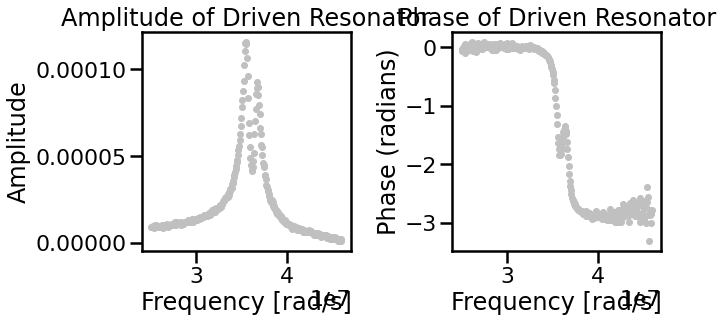

In [10]:
#Correct phase data based on R1 spectra

#NOTE: If you get error then you might need to adjust the mask bounds

#Fit linear part of phase to flatten
mk = (df.w < 3.405*10**7) 
mk2 = (df.w < 4.6*10**7) & (df.w > 2.5*10**7)
#mk = (df.w < 3.3*10**7) 

x = df.w[mk]
y = df.unwrap[mk]

#Perform linear fit
model = lmfit.models.LinearModel()
params = model.make_params(intercept = 0, slope = 0)
result = model.fit(y, params, x = x)


#Define linear phase, convert to radians, and unwrap
df['radLin'] = df.unwrap - result.best_values['intercept'] - result.best_values['slope'] * df.w

print(lmfit.fit_report(result))

#Plot ampliutde and phase curves"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,5))

ax1.plot(df.w[mk2], df.R[mk2], '.', color = 'silver')
ax1.set_xlabel('Frequency [rad/s]')
ax1.set_ylabel('Amplitude')
ax1.set_title('Amplitude of Driven Resonator')

ax2.plot(df.w[mk2], df.radLin[mk2], '.', color = 'silver')
ax2.set_xlabel('Frequency [rad/s]')
ax2.set_ylabel('Phase (radians)')
ax2.set_title('Phase of Driven Resonator')

fig.tight_layout()

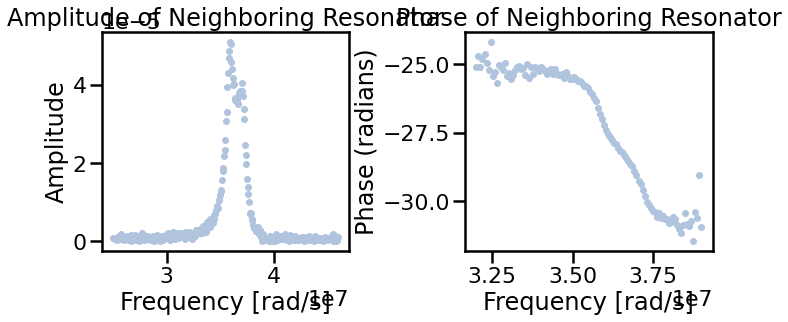

In [11]:
#Correct R2 phase data based on R1 spectra

#NOTE: If you get error then you might need to adjust the mask bounds

#Define linear phase, convert to radians, and unwrap
mk_phase = (df.w > 3.2*10**7) & (df.w < 3.9*10**7)
df2['radLin'] = df2.unwrap - result.best_values['intercept'] - result.best_values['slope'] * df2.w

#Plot ampliutde and phase curves"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,5))

ax1.plot(df2.w[mk2], df2.R[mk2], '.', color = 'lightsteelblue')
ax1.set_xlabel('Frequency [rad/s]')
ax1.set_ylabel('Amplitude')
ax1.set_title('Amplitude of Neighboring Resonator')

ax2.plot(df2.w[mk_phase], df2.radLin[mk_phase], '.', color = 'lightsteelblue')
ax2.set_xlabel('Frequency [rad/s]')
ax2.set_ylabel('Phase (radians)')
ax2.set_title('Phase of Neighboring Resonator')

fig.tight_layout()

In [12]:
#Define all variables

#individual springs that correspond to individual masses
k1 = sp.symbols('k_1', real = True)
k2 = sp.symbols('k_2', real = True)

#springs that connect two masses
k12 = sp.symbols('k_12', real = True)

#damping coefficients
g1 = sp.symbols('g', real = True)
g2 = sp.symbols('g2', real = True)
 
#masses
m1 = sp.symbols('m1', real = True)
m2 = sp.symbols('m2', real = True)

#Driving force amplitude
F = sp.symbols('F', real = True)

#driving frequency (leave as variable)
wd = sp.symbols('\omega_d', real = True)

In [13]:
#Solve for driving amplitudes and phase

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2*m1 + 1j*wd*g1 + k1 + k12, -k12], [-k12, -wd**2*m2 + 
  1j*wd*g2 + k2 + k12]])

#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F, -k12], [0, -wd**2*m2 + 1j*wd*g2 + k2 + k12]])

driven_m2 = sp.Matrix([[-wd**2*m1 + 1j*wd*g1 + k1 + k12, F], [-k12, 0]])

#Apply Cramer's Rule
Cr1, Cr2 = (driven_m1.det()/driven.det(), driven_m2.det()/driven.det())

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
#amp1 = sp.sqrt(Cr1*sp.conjugate(Cr1))
#amp2 = sp.sqrt(Cr2*sp.conjugate(Cr2))

In [14]:
#lambdify curves

c1 = sp.lambdify((wd, k1, k2, k12, g1, g2, F, m1, m2), amp1)
t1 = sp.lambdify((wd, k1, k2, k12, g1, g2, F,  m1, m2), wrap1)

c2 = sp.lambdify((wd, k1, k2, k12, g1, g2, F, m1, m2), amp2)
t2 = sp.lambdify((wd, k1, k2, k12, g1, g2, F, m1, m2), wrap2)

#define functions

def curve1(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2):
     return c1(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2)
    
def theta1(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2):
     return t1(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2) - 2*np.pi
    
def curve2(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2):
     return c2(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2)
    
def theta2(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2):
     return t2(w, k_1, k_2, k_12, g1_, g2_, F_, m_1, m_2) - 2*np.pi
    
#Definte data

x1 = df.F[mk2].values * 2 * np.pi
y1 = df.R[mk2].values
th1 = df[mk2].radLin.values

x2 = df2[mk_phase].F.values * 2 * np.pi
y2 = df2[mk_phase].R.values
th2 = df2[mk_phase].radLin.values

In [15]:
#Define redisule function

def residual(params, omega, data_amp, data_phase):
    Fn = params['Fn']
    k1 = params['k1']
    k2 = params['k2']
    k12 = params['k12']
    g1 = params['g1']
    g2 = params['g2']
    m1 = params['m1']
    m2 = params['m2']
    
    model1 = curve1(omega, k1, k2, k12, g1*10**-10, g2*10**-10, Fn*10**-7, m1*10**-16, m2*10**-16)
    model2 = theta1(omega, k1, k2, k12, g1*10**-10, g2*10**-10, Fn*10**-7, m1*10**-16, m2*10**-16)
    
    resid1 = data_amp - model1
    #resid2 = data_phase - model2
    
    #return np.concatenate((resid1, resid2))
    return resid1

params = lmfit.Parameters()
params.add('Fn', value = 1, min = 0)
params.add('k1', value = 1, min = 0)
params.add('k2', value = 1, min = 0)
params.add('k12', value = 1, min = 0)
params.add('g1', value = 1, min = 0)
params.add('g2', value = 1, min = 0)
params.add('m1', value = 1, min = 0)
params.add('m2', value = 1, min = 0)

out = lmfit.minimize(residual, params, args = (x1, y1, th1))

Fn = out.params['Fn'].value
k1 = out.params['k1'].value
k2 = out.params['k2'].value
k12 = out.params['k12'].value
g1 = out.params['g1'].value
g2 = out.params['g2'].value
m1 = out.params['m1'].value
m2 = out.params['m2'].value

print(lmfit.fit_report(out))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 454
    # data points      = 334
    # variables        = 8
    chi-square         = 2.4890e-08
    reduced chi-square = 7.6349e-11
    Akaike info crit   = -7772.86480
    Bayesian info crit = -7742.37567
[[Variables]]
    Fn:   21.0141827 +/- 159576.173 (759373.69%) (init = 1)
    k1:   0.41088776 +/- 3504.89185 (853004.68%) (init = 1)
    k2:   0.55405955 +/- 14699.5265 (2653058.94%) (init = 1)
    k12:  0.08915493 +/- 1184.98001 (1329124.49%) (init = 1)
    g1:   6.40000719 +/- 48617.8543 (759653.12%) (init = 1)
    g2:   0.70790274 +/- 17080.1030 (2412775.39%) (init = 1)
    m1:   3.69146925 +/- 28034.7388 (759446.63%) (init = 1)
    m2:   3.08293383 +/- 75881.9412 (2461354.84%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(g1, m1)  =  1.000
    C(Fn, m1)  =  1.000
    C(Fn, g1)  =  1.000
    C(g2, m2)  =  1.000
    C(k2, m2)  =  1.000
    C(k2, g2)  =  1.000
    C(k12, g2) =  0.

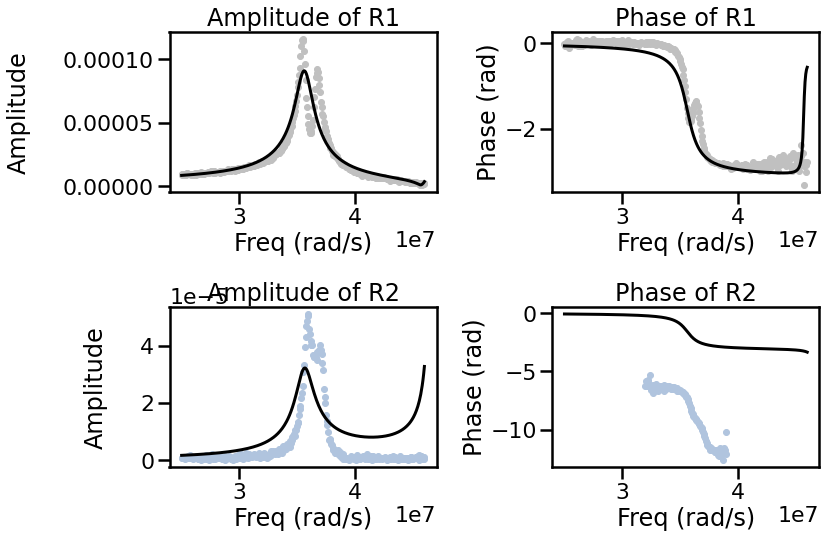

In [16]:
#Plots

sns.set_context('poster')

m1_col = "#2A4F98"
m2_col = "#E4A52D"

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (12,8))

ax1.plot(x1, y1, '.', color = 'silver')
ax1.plot(x1, curve1(x1, k1, k2, k12, g1*10**-10, g2*10**-10, Fn*10**-7, m1*10**-16, m2*10**-16), '-', color='black')
ax1.set_xlabel('Freq (rad/s)')
ax1.set_ylabel('Amplitude\n')
ax1.set_title('Amplitude of R1')

ax2.plot(x1, th1, '.', color = 'silver')
ax2.plot(x1, theta1(x1, k1, k2, k12, g1*10**-10, g2*10**-10, Fn*10**-7, m1*10**-16, m2*10**-16), '-', color='black')
ax2.set_xlabel('Freq (rad/s)')
ax2.set_ylabel('Phase (rad)')
ax2.set_title('Phase of R1')

ax3.plot(x1, df2[mk2].R.values, '.', color = 'lightsteelblue')
ax3.plot(x1, curve2(x1, k1, k2, k12, g1*10**-10, g2*10**-10, Fn*10**-7, m1*10**-16, m2*10**-16), '-', color='black')
ax3.set_xlabel('Freq (rad/s)')
ax3.set_ylabel('Amplitude\n')
ax3.set_title('Amplitude of R2')

ax4.plot(x2, th2+2*np.pi*3, '.', color = 'lightsteelblue')
ax4.plot(x1, theta2(x1, k1, k2, k12, g1*10**-10, g2*10**-10, Fn*10**-7, m1*10**-16, m2*10**-16), '-', color='black')
ax4.set_xlabel('Freq (rad/s)')
ax4.set_ylabel('Phase (rad)')
ax4.set_title('Phase of R2')

plt.tight_layout()

In [17]:
#Define function to calculate phase correction and complex amplitudes

phaseCor = []
ampComplex = []

def complexAmp(df, intercept, slope):
    
    #Correct phase with calculated intercept and slope from time delays
    x1 = df['R1Phase'] - (intercept + slope * df['wDrive'])
    x2 = df['R2Phase'] - (intercept + slope * df['wDrive'])
    
    #Add corrected phase to table to append to dataframe
    phaseCor.append([x1%(-2*np.pi), x2%(-2*np.pi)])
    
    #Use amplitude and corrected phase to calculate complex amplitude
    Z1 = df['R1Amp'] * np.exp(1j * x1)
    Z2 = df['R2Amp'] * np.exp(1j * x2)
    
    #Add complex amplitude to table to append to dataframe
    ampComplex.append([Z1, Z2])


for i in range(df_vals.shape[0]):
    complexAmp(df_vals.iloc[i], result.best_values['intercept'], result.best_values['slope'])

df_vals['R1PhaseCor'], df_vals['R2PhaseCor'] = np.transpose(phaseCor)
df_vals['R1AmpCom'], df_vals['R2AmpCom'] = np.transpose(ampComplex)

df_vals

,wDrive,R1Amp,R1Amp_error,R1Phase,R1Phase_error,R2Amp,R2Amp_error,R2Phase,R2Phase_error,R1PhaseCor,R2PhaseCor,R1AmpCom,R2AmpCom
0,34966744.682171,0.000098,0.000003,1.332501,0.003452,0.000033,0.000001,1.038667,0.004927,-0.215790,-0.509624,0.000095-0.000021j,0.000029-0.000016j
1,37107308.797757,0.000204,0.000007,-1.999097,0.01032,0.000136,0.000005,1.558043,0.012642,-1.943586,-4.669632,-0.000074-0.000190j,-0.000006+0.000136j
2,35722237.899436,0.000202,0.000012,0.694844,0.009137,0.000114,0.000005,0.110739,0.016486,-0.287399,-0.871504,0.000194-0.000057j,0.000074-0.000088j


#Singular Value Decomposition for two points

#define which two points to use for analysis
vals1 = df_vals.loc[1]
vals2 = df_vals.loc[4]

#define values for svd
d1 = vals1['wDrive']
d1Z1 = vals1['R1AmpCom']
d1Z2 = vals1['R2AmpCom']

d2 = vals2['wDrive']
d2Z1 = vals2['R1AmpCom']
d2Z2 = vals2['R2AmpCom']

#Define Matrix M
M = np.array([[-d1**2*np.real(d1Z1), 0, -d1*np.imag(d1Z1), 0, np.real(d1Z1), 0, np.real(d1Z1)-np.real(d1Z2), -1],
        [-d1**2*np.imag(d1Z1), 0, d1*np.real(d1Z1), 0, np.imag(d1Z1), 0, np.imag(d1Z1)-np.imag(d1Z2), 0],
        [0, -d1**2*np.real(d1Z2), 0, -d1*np.imag(d1Z2), 0, np.real(d1Z2), np.real(d1Z2)-np.real(d1Z1), 0],
        [0, -d1**2*np.imag(d1Z2), 0, d1*np.real(d1Z2), 0, np.imag(d1Z2), np.imag(d1Z2)-np.imag(d1Z1), 0],
        [-d2**2*np.real(d2Z1), 0, -d2*np.imag(d2Z1), 0, np.real(d2Z1), 0, np.real(d2Z1)-np.real(d2Z2), -1],
        [-d2**2*np.imag(d2Z1), 0, d2*np.real(d2Z1), 0, np.imag(d2Z1), 0, np.imag(d2Z1)-np.imag(d2Z2), 0],
        [0, -d2**2*np.real(d2Z2), 0, -d2*np.imag(d2Z2), 0, np.real(d2Z2), np.real(d2Z2)-np.real(d2Z1), 0],
        [0, -d2**2*np.imag(d2Z2), 0, d2*np.real(d2Z2), 0, np.imag(d2Z2), np.imag(d2Z2)-np.imag(d2Z1), 0]])

#SVD
#u, s, vh = np.linalg.svd(M, full_matrices = True)
u, s, vh = sc.linalg.svd(M, full_matrices = False, lapack_driver = 'gesvd')

In [18]:
#Singular value decomposition for three points

#define which two points to use for analysis
vals1 = df_vals.loc[0]
vals2 = df_vals.loc[1]
vals3 = df_vals.loc[2]

#define values for svd
d1 = vals1['wDrive']
d1Z1 = vals1['R1AmpCom']
d1Z2 = vals1['R2AmpCom']

d2 = vals2['wDrive']
d2Z1 = vals2['R1AmpCom']
d2Z2 = vals2['R2AmpCom']

d3 = vals3['wDrive']
d3Z1 = vals3['R1AmpCom']
d3Z2 = vals3['R2AmpCom']

#Define Matrix M
M = np.array([[-d1**2*np.real(d1Z1), 0, -d1*np.imag(d1Z1), 0, np.real(d1Z1), 0, np.real(d1Z1)-np.real(d1Z2), -1],
        [-d1**2*np.imag(d1Z1), 0, d1*np.real(d1Z1), 0, np.imag(d1Z1), 0, np.imag(d1Z1)-np.imag(d1Z2), 0],
        [0, -d1**2*np.real(d1Z2), 0, -d1*np.imag(d1Z2), 0, np.real(d1Z2), np.real(d1Z2)-np.real(d1Z1), 0],
        [0, -d1**2*np.imag(d1Z2), 0, d1*np.real(d1Z2), 0, np.imag(d1Z2), np.imag(d1Z2)-np.imag(d1Z1), 0],
        [-d2**2*np.real(d2Z1), 0, -d2*np.imag(d2Z1), 0, np.real(d2Z1), 0, np.real(d2Z1)-np.real(d2Z2), -1],
        [-d2**2*np.imag(d2Z1), 0, d2*np.real(d2Z1), 0, np.imag(d2Z1), 0, np.imag(d2Z1)-np.imag(d2Z2), 0],
        [0, -d2**2*np.real(d2Z2), 0, -d2*np.imag(d2Z2), 0, np.real(d2Z2), np.real(d2Z2)-np.real(d2Z1), 0],
        [0, -d2**2*np.imag(d2Z2), 0, d2*np.real(d2Z2), 0, np.imag(d2Z2), np.imag(d2Z2)-np.imag(d2Z1), 0],
        [-d3**2*np.real(d3Z1), 0, -d3*np.imag(d3Z1), 0, np.real(d3Z1), 0, np.real(d3Z1)-np.real(d3Z2), -1],
        [-d3**2*np.imag(d3Z1), 0, d3*np.real(d3Z1), 0, np.imag(d3Z1), 0, np.imag(d3Z1)-np.imag(d3Z2), 0],
        [0, -d3**2*np.real(d3Z2), 0, -d3*np.imag(d3Z2), 0, np.real(d3Z2), np.real(d3Z2)-np.real(d3Z1), 0],
        [0, -d3**2*np.imag(d3Z2), 0, d3*np.real(d3Z2), 0, np.imag(d3Z2), np.imag(d3Z2)-np.imag(d3Z1), 0]])

#SVD
#u, s, vh = np.linalg.svd(M, full_matrices = True)
u, s, vh = sc.linalg.svd(M, full_matrices = False, lapack_driver = 'gesvd')

s

array([3.99362447e+11, 2.40521652e+11, 1.09974494e+04, 6.58681215e+03,
       1.33180579e+00, 2.74422432e-04, 4.75790231e-06, 1.69396563e-06])

In [19]:
vh

array([[ 1.00000000e+00,  0.00000000e+00,  8.54012478e-25,
         0.00000000e+00, -7.58314734e-16,  0.00000000e+00,
        -7.99192059e-16,  1.63865386e-12],
       [-6.47732242e-36,  1.00000000e+00, -3.63900080e-20,
        -1.99722699e-16,  2.02700865e-20, -7.49967078e-16,
        -8.62738750e-16,  1.85327915e-16],
       [-1.33108386e-16, -3.79637283e-20, -9.99999997e-01,
         1.33180522e-11,  3.69066606e-13,  1.09461069e-24,
        -7.45992959e-09,  8.12303222e-05],
       [ 1.66120434e-23, -4.54280858e-17, -1.33182071e-11,
        -1.00000000e+00,  6.39451098e-17,  1.08406264e-16,
         2.07922291e-08,  3.01530347e-15],
       [ 1.63865378e-12, -5.01698728e-19, -8.12303212e-05,
        -1.92675090e-12,  9.28477462e-06,  9.71157154e-14,
        -9.25738830e-05, -9.99999992e-01],
       [-9.47968163e-16, -8.45085356e-16,  1.49777303e-08,
        -2.07857468e-08,  3.53114174e-03,  2.47175127e-02,
        -9.99688235e-01,  9.25778071e-05],
       [ 6.89243632e-16, -2.707560

In [20]:
[M1, M2, G1, G2, K1, K2, K12, FD] = vh[7]

vals = [['Norm m1', 'Norm m2', 'Norm g1', 'Norm g2', 'Norm k1', 'Norm k2','Norm c12', 'Norm  Force']]
vals.append((M1, M2, G1, G2, K1, K2, K12, FD))

print(tabulate(vals, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════════╤══════════════╤═════════════╤═════════════╤═══════════╤═══════════╤════════════╤═══════════════╕
│      Norm m1 │      Norm m2 │     Norm g1 │     Norm g2 │   Norm k1 │   Norm k2 │   Norm c12 │   Norm  Force │
╞══════════════╪══════════════╪═════════════╪═════════════╪═══════════╪═══════════╪════════════╪═══════════════╡
│ -2.87553e-16 │ -7.22001e-16 │ 9.63741e-11 │ -5.0642e-10 │ -0.355797 │ -0.934246 │ -0.0243562 │  -1.04875e-06 │
╘══════════════╧══════════════╧═════════════╧═════════════╧═══════════╧═══════════╧════════════╧═══════════════╛


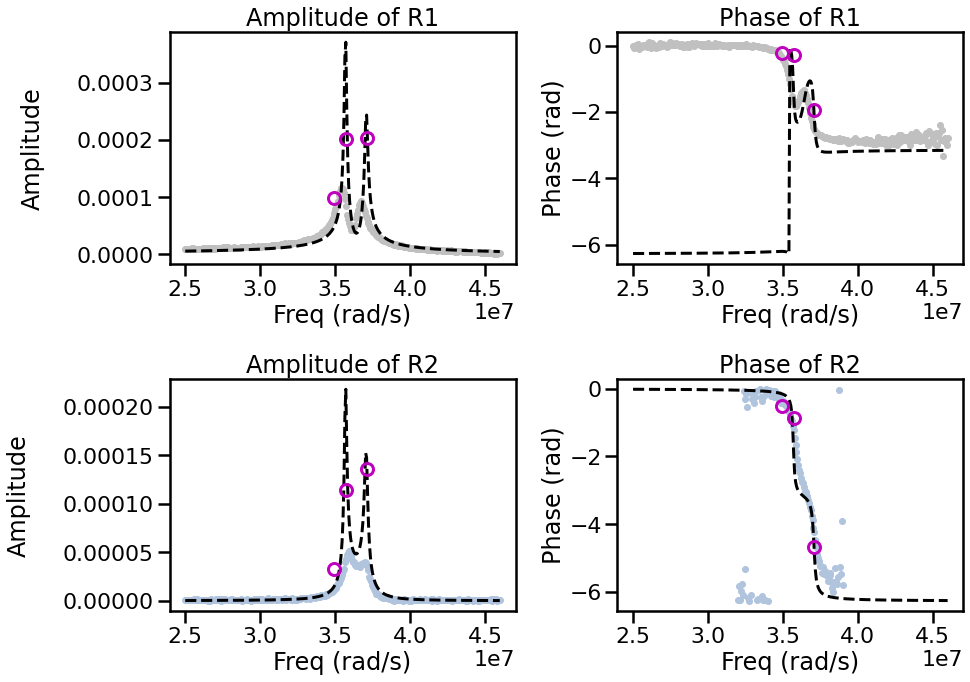

In [21]:
#Plots of singular value decompositino

sns.set_context('poster')

m1_col = "#2A4F98"
m2_col = "#E4A52D"

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (14,10))

ax1.plot(x1, y1, '.', color = 'silver')
ax1.plot(x1, curve1(x1, K1, K2, K12, G1, G2, FD, M1, M2), '--', color='black')
ax1.set_xlabel('Freq (rad/s)')
ax1.set_ylabel('Amplitude\n')
ax1.set_title('Amplitude of R1')

for i in range(df_vals.shape[0]):
        ax1.plot(df_vals.wDrive[i], df_vals.R1Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)
        

ax2.plot(x1, th1, '.', color = 'silver')
ax2.plot(x1, theta1(x1, K1, K2, K12, G1, G2, FD, M1, M2), '--', color='black')
ax2.set_xlabel('Freq (rad/s)')
ax2.set_ylabel('Phase (rad)')
ax2.set_title('Phase of R1')

for i in range(df_vals.shape[0]):
        ax2.plot(df_vals.wDrive[i], df_vals.R1PhaseCor[i]%(-2*np.pi), 'mo', fillstyle='none', markeredgewidth = 3)
        

ax3.plot(x1, df2[mk2].R.values, '.', color = 'lightsteelblue')
ax3.plot(x1, curve2(x1, K1, K2, K12, G1, G2, FD, M1, M2), '--', color='black')
ax3.set_xlabel('Freq (rad/s)')
ax3.set_ylabel('Amplitude\n')
ax3.set_title('Amplitude of R2')

for i in range(df_vals.shape[0]):
    ax3.plot(df_vals.wDrive[i], df_vals.R2Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)
    

ax4.plot(x2, th2%(-2*np.pi), '.', color = 'lightsteelblue')
ax4.plot(x1, theta2(x1, K1, K2, K12, G1, G2, FD, M1, M2), '--', color='black')
ax4.set_xlabel('Freq (rad/s)')
ax4.set_ylabel('Phase (rad)')
ax4.set_title('Phase of R2')

for i in range(df_vals.shape[0]):
        ax4.plot(df_vals.wDrive[i], df_vals.R2PhaseCor[i]%(-2*np.pi), 'mo', fillstyle='none', markeredgewidth = 3)
        

plt.tight_layout()

**SVD with small angle slope error**

In [22]:
#Singular value decomposition for three points

#define which two points to use for analysis
vals1 = df_vals.loc[0]
vals2 = df_vals.loc[1]
vals3 = df_vals.loc[2]

#define values for svd
d1 = vals1['wDrive']
d1Z1 = vals1['R1AmpCom']
d1Z2 = vals1['R2AmpCom']

d2 = vals2['wDrive']
d2Z1 = vals2['R1AmpCom']
d2Z2 = vals2['R2AmpCom']

d3 = vals3['wDrive']
d3Z1 = vals3['R1AmpCom']
d3Z2 = vals3['R2AmpCom']

#Define Matrix M
M2 = np.array([[-d1**2*np.real(d1Z1), 0, -d1*np.imag(d1Z1), 0, np.real(d1Z1), 0, np.real(d1Z1)-np.real(d1Z2), -1, 0],
        [-d1**2*np.imag(d1Z1), 0, d1*np.real(d1Z1), 0, np.imag(d1Z1), 0, np.imag(d1Z1)-np.imag(d1Z2), 0, d1],
        [0, -d1**2*np.real(d1Z2), 0, -d1*np.imag(d1Z2), 0, np.real(d1Z2), np.real(d1Z2)-np.real(d1Z1), 0, 0],
        [0, -d1**2*np.imag(d1Z2), 0, d1*np.real(d1Z2), 0, np.imag(d1Z2), np.imag(d1Z2)-np.imag(d1Z1), 0, 0],
        [-d2**2*np.real(d2Z1), 0, -d2*np.imag(d2Z1), 0, np.real(d2Z1), 0, np.real(d2Z1)-np.real(d2Z2), -1, 0],
        [-d2**2*np.imag(d2Z1), 0, d2*np.real(d2Z1), 0, np.imag(d2Z1), 0, np.imag(d2Z1)-np.imag(d2Z2), 0, d2],
        [0, -d2**2*np.real(d2Z2), 0, -d2*np.imag(d2Z2), 0, np.real(d2Z2), np.real(d2Z2)-np.real(d2Z1), 0, 0],
        [0, -d2**2*np.imag(d2Z2), 0, d2*np.real(d2Z2), 0, np.imag(d2Z2), np.imag(d2Z2)-np.imag(d2Z1), 0, 0],
        [-d3**2*np.real(d3Z1), 0, -d3*np.imag(d3Z1), 0, np.real(d3Z1), 0, np.real(d3Z1)-np.real(d3Z2), -1, 0],
        [-d3**2*np.imag(d3Z1), 0, d3*np.real(d3Z1), 0, np.imag(d3Z1), 0, np.imag(d3Z1)-np.imag(d3Z2), 0, d3],
        [0, -d3**2*np.real(d3Z2), 0, -d3*np.imag(d3Z2), 0, np.real(d3Z2), np.real(d3Z2)-np.real(d3Z1), 0, 0],
        [0, -d3**2*np.imag(d3Z2), 0, d3*np.real(d3Z2), 0, np.imag(d3Z2), np.imag(d3Z2)-np.imag(d3Z1), 0, 0]])

#SVD
u2, s2, vh2 = sc.linalg.svd(M2, full_matrices = False, lapack_driver = 'gesvd')

s2

array([3.99362449e+11, 2.40521652e+11, 5.27427290e+07, 9.81784724e+03,
       6.58681214e+03, 1.33177665e+00, 2.69156298e-04, 2.42047425e-06,
       1.66502921e-06])

In [23]:
vh2

array([[ 9.99999997e-01, -3.57029051e-28,  1.35709573e-16,
         0.00000000e+00, -7.58314732e-16,  0.00000000e+00,
        -7.99192057e-16,  1.63865385e-12,  8.28177191e-05],
       [-7.56661322e-27,  1.00000000e+00, -1.16265468e-18,
        -1.77191870e-16,  1.02705747e-23, -7.49967078e-16,
        -8.62663093e-16,  1.07220636e-22, -2.21610235e-16],
       [-8.28177187e-05,  1.20935552e-23,  9.39499379e-05,
        -9.10786388e-25,  6.90151757e-14, -1.85372963e-31,
        -2.18733590e-13, -7.78071959e-09,  9.99999992e-01],
       [-7.78071959e-09, -1.04094797e-18, -9.99999992e-01,
         5.07244986e-13,  1.87125651e-10,  1.70333682e-25,
        -9.95184462e-09,  8.08259595e-05,  9.39499379e-05],
       [-3.93206971e-21, -1.17252859e-17, -5.07453411e-13,
        -1.00000000e+00, -2.57908225e-18, -2.71981007e-16,
         2.07922291e-08, -1.86191565e-14,  4.76796187e-17],
       [ 1.65415110e-12, -8.08158473e-20, -8.08259586e-05,
        -1.90054030e-12,  9.27529353e-06,  9.682262

In [24]:
[M1_2, M2_2, G1_2, G2_2, K1_2, K2_2, K12_2, FD_2, T] = vh2[8]

vals2 = [['m1', 'm2', 'g1', 'g2', 'k1', 'k2','c12', 'Force', 'Time Delay']]
vals2.append((M1_2, M2_2, G1_2, G2_2, K1_2, K2_2, K12_2, FD_2, T))

print(tabulate(vals2, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════════╤═════════════╤═════════════╤═════════════╤══════════╤══════════╤═══════════╤═════════════╤══════════════╕
│          m1 │          m2 │          g1 │          g2 │       k1 │       k2 │       c12 │       Force │   Time Delay │
╞═════════════╪═════════════╪═════════════╪═════════════╪══════════╪══════════╪═══════════╪═════════════╪══════════════╡
│ 3.96694e-16 │ 6.68034e-16 │ 7.82947e-11 │ 4.69257e-10 │ 0.503061 │ 0.863956 │ 0.0225689 │ 2.58284e-06 │ -1.70416e-14 │
╘═════════════╧═════════════╧═════════════╧═════════════╧══════════╧══════════╧═══════════╧═════════════╧══════════════╛


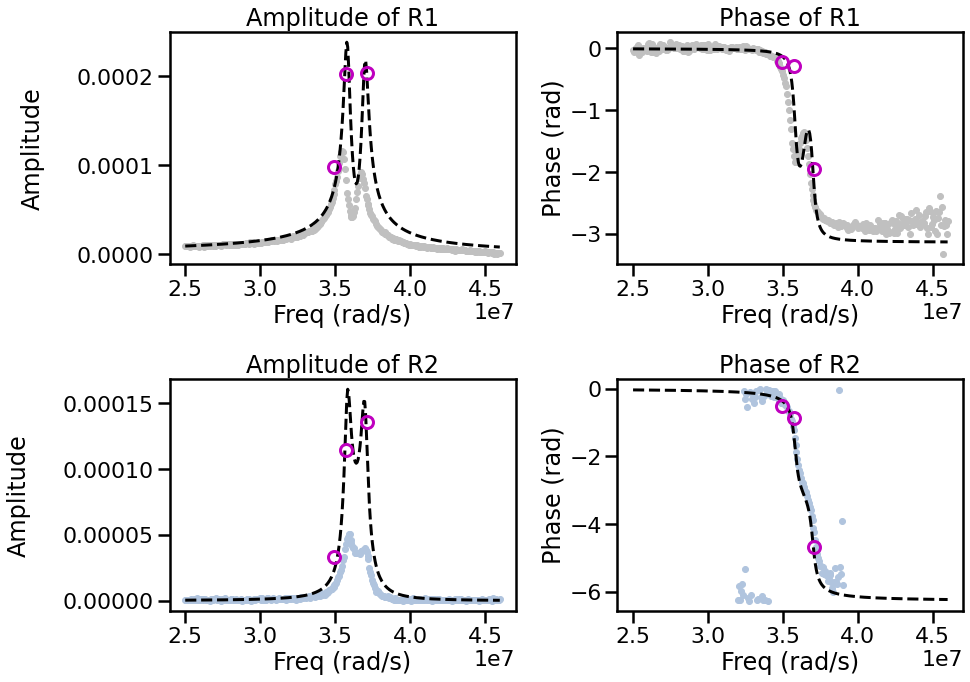

In [25]:
#Plots of singular value decompositino

sns.set_context('poster')

m1_col = "#2A4F98"
m2_col = "#E4A52D"

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (14,10))

ax1.plot(x1, y1, '.', color = 'silver')
ax1.plot(x1, curve1(x1, K1_2, K2_2, K12_2, G1_2, G2_2, FD_2, M1_2, M2_2), '--', color='black')
ax1.set_xlabel('Freq (rad/s)')
ax1.set_ylabel('Amplitude\n')
ax1.set_title('Amplitude of R1')

for i in range(df_vals.shape[0]):
        ax1.plot(df_vals.wDrive[i], df_vals.R1Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)
        

ax2.plot(x1, th1, '.', color = 'silver')
ax2.plot(x1, theta1(x1, K1_2, K2_2, K12_2, G1_2, G2_2, FD_2, M1_2, M2_2) - x1*T, '--', color='black')
ax2.set_xlabel('Freq (rad/s)')
ax2.set_ylabel('Phase (rad)')
ax2.set_title('Phase of R1')

for i in range(df_vals.shape[0]):
        ax2.plot(df_vals.wDrive[i], df_vals.R1PhaseCor[i]%(-2*np.pi), 'mo', fillstyle='none', markeredgewidth = 3)
        

ax3.plot(x1, df2[mk2].R.values, '.', color = 'lightsteelblue')
ax3.plot(x1, curve2(x1, K1_2, K2_2, K12_2, G1_2, G2_2, FD_2, M1_2, M2_2), '--', color='black')
ax3.set_xlabel('Freq (rad/s)')
ax3.set_ylabel('Amplitude\n')
ax3.set_title('Amplitude of R2')

for i in range(df_vals.shape[0]):
    ax3.plot(df_vals.wDrive[i], df_vals.R2Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)
    

ax4.plot(x2, th2%(-2*np.pi), '.', color = 'lightsteelblue')
ax4.plot(x1, theta2(x1, K1_2, K2_2, K12_2, G1_2, G2_2, FD_2, M1_2, M2_2) - x1*T, '--', color='black')
ax4.set_xlabel('Freq (rad/s)')
ax4.set_ylabel('Phase (rad)')
ax4.set_title('Phase of R2')

for i in range(df_vals.shape[0]):
        ax4.plot(df_vals.wDrive[i], df_vals.R2PhaseCor[i]%(-2*np.pi), 'mo', fillstyle='none', markeredgewidth = 3)
        

plt.tight_layout()